## Polynomiale Regression
----------------------------------------

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Wir beginnen mit unserer Übung, indem wir Daten sammeln. Die Daten werden von einer Funktion generiert, die Sie nicht kennen. Diese Vorbedingung macht das Beispiel realistischer, da wir in realen Anwendungen die genauen Spezifikationen des zugrunde liegenden Datenerzeugungsprozesses nicht kennen. Am Ende dieses Abschnitts lüften wir das Geheimnis des Datengenerierungsprozesses.

Dies sind die Daten, unsere Beobachtungen, in tabellarischer Form. Wir haben $25$ Datenpunkte, jeder Datenpunkt ist ein ($x,y$) Paar.

In [40]:
poly_data =pd.DataFrame({'x':[0.001399613,0.971629779,0.579119475,0.335693937,0.736736086,0.492572335,0.737133774,0.563693769,0.877603280,0.141426545,0.307203910,0.024509308,0.843665029,0.771206067,0.149670258,0.359605608,0.049612895,0.409898906,0.935457898,0.149476207,0.234315216,0.455297119,0.102696671,0.715372314,0.681745393],'y':[-0.23436656,0.64689524,-0.92635765,0.13000706,-0.89294863,0.33854780,-1.24171910,-0.22523318,-0.12962722,0.37632006,0.30299077,-0.21162739,-0.76468719,-0.90455412,0.77097952,0.56466366,0.18897607,0.32531750,-0.78703491,0.80585375,0.62944986,0.02353327,0.27621694,-1.20379729,-0.83059624]})

Hier sind die Daten in Form eines Streudiagramms dargestellt:

Text(0, 0.5, 'y')

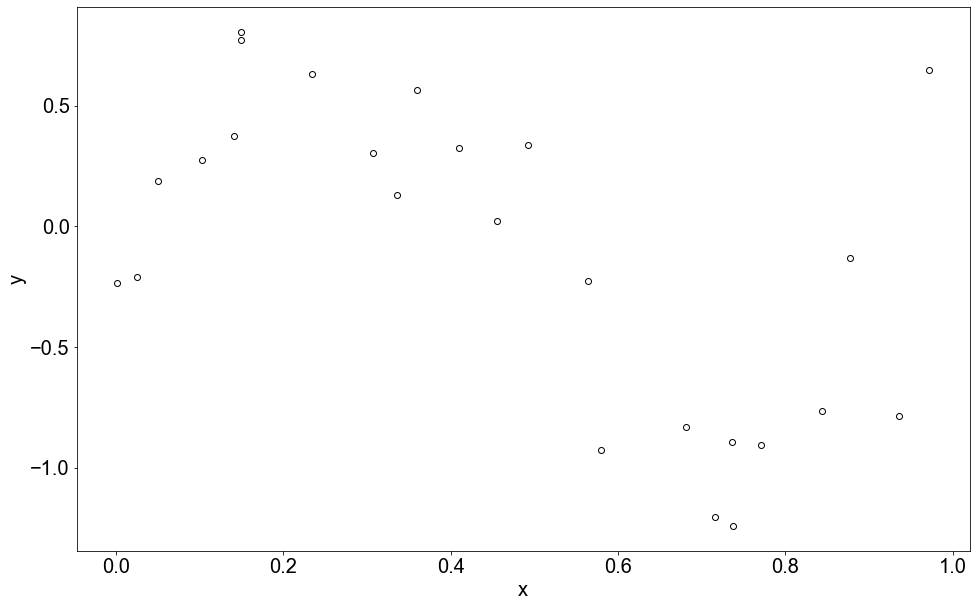

In [41]:
fig = plt.figure()
X = poly_data['x']
y = poly_data['y']
plt.scatter(X,y,edgecolor = 'k',color = 'white')
plt.xlabel('x')
plt.ylabel('y')

### Anpassen einer Kurve in Python: Die Notation in Python

Python bietet leistungsstarke Funktionen zur Anpassung eines Polynoms an Daten. Um ein $k$-dimensionales Polynom anzupassen, verwenden wir `linear_model` aus dem `sklearn` Paket  und fügen dem Funktionsaufruf `LinearRegression()` zusätzliche `PolynomialFeatures` hinzu. Darüber hinaus gibt es zwei verschiedene Möglichkeiten, eine polynomiale Regression zu kodieren.

Für ein Polynom $2$. Ordnung besteht die erste Möglichkeit darin, `model.predict(X-werte)` einzugeben und zu plotten, und die zweite Möglichkeit ist die Koeffizienten mit `model.coef_` aus dem Model auszulesen und daraus Äquivalent zu $\hat y = \beta_0+\beta_1x+\beta_2x^2+...+\beta_kx^k+\epsilon$  `model.coef_[0][0] + model.coef_[0][1] * X-werte + model.coef_[0][2] * (X-werte)**2 + ...` zu konstruieren.

Um die Verwirrung zu lindern, zeigen wir ein Beispiel in Python. Wir konstruieren zwei Polynome der Ordnung $2$ für `poly_data`.

In [45]:
X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

# Polynomial Fit
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_2, y)

LinearRegression()

Zum Auslesen der Koeffizienten und des Achsenabschnitts des Modells verwenden wir das Attribut `coef_` und `intercept_`.

Wir überprüfen die Ergebnisse des Modells.

In [46]:
print('Achsenabschnitt :',model.intercept_)
print('Koeffizienten : ', model.coef_)

Achsenabschnitt : [0.4591628]
Koeffizienten :  [[ 0.         -1.36814765  0.18900934]]


Bei der Ausgabe der Koeffizienten dient der nullte Koeffizient als Platzhalter für den Achsenabschnitt und kann daher ignoriert werden.

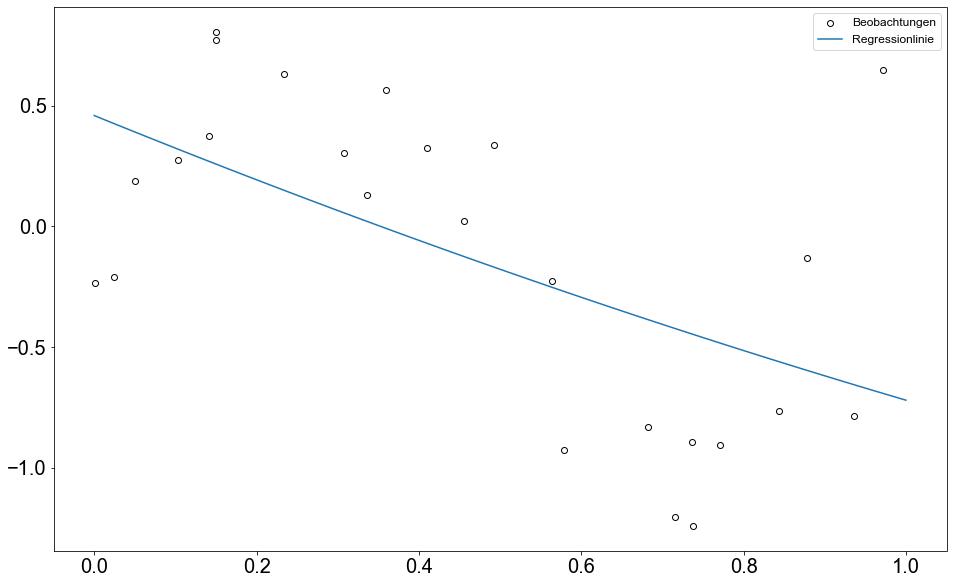

In [47]:
# Definiere x- Achse zur Vorhersage von Datenpunkten
x_axis = np.linspace(0,1,50)
# Konstruiere Regressionslinie
response = model.intercept_ + model.coef_[0][1]*x_axis + model.coef_[0][2]*x_axis**2

fig, ax = plt.subplots()
ax.scatter(poly_data['x'],poly_data['y'],color = 'white',edgecolor ='k', label='Beobachtungen')
ax.plot(x_axis, response, label='Regressionlinie')
ax.legend();

Andererseits können wir die Regressionslinie auch mit der Methode `predict()` für beliebige $x$-Werte erzeugen.

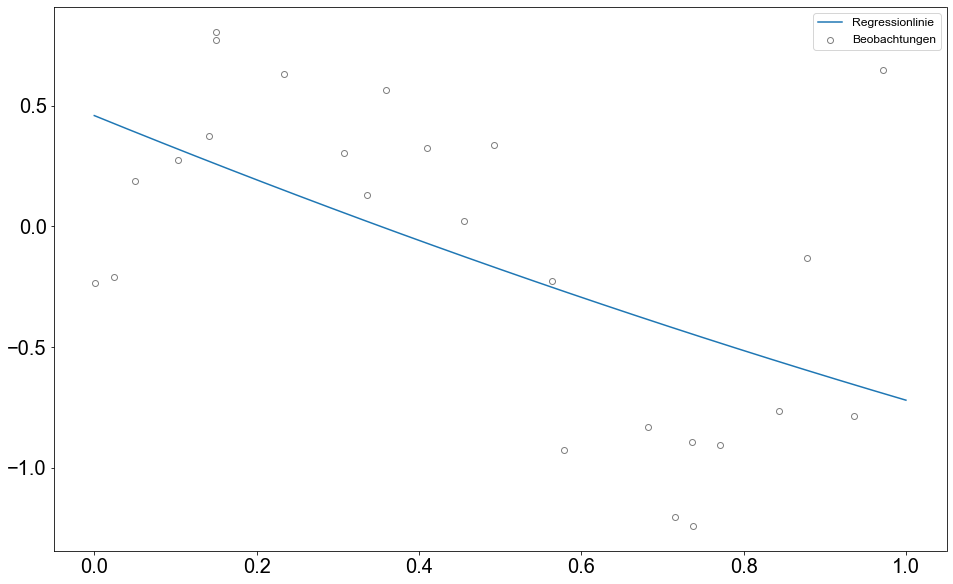

In [48]:
X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

# Polynomial Fit
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_2, y)

X_predict_reg_line = poly.transform(np.linspace(0,1, 25).reshape(-1,1))
y_reg_line = model.predict(X_predict_reg_line)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1, 25), y_reg_line, label='Regressionlinie')
ax.scatter(x=X, y=y,
           alpha=0.5,  color="white", edgecolor = 'k', label='Beobachtungen')

ax.legend();

### Anpassen einer Kurve in Python (Fortsetzung)

Da wir nun die Notation in Python kennen, beginnen wir mit der Erstellung von $6$ verschiedenen Modellen, mit $k=1,2,3,5,9,14$. Für jedes Modell berechnen wir den $RMSE$. Schließlich stellen wir die Daten zusammen mit der Regressionslinie dar, die durch jedes einzelne Modell gegeben ist. Der Einfachheit halber konstruieren wir einen Loop, um den Kodierungsaufwand zu verringern.

RMSE (k=) : 1 0.5249892684216972
RMSE (k=) : 2 0.5247914320357341
RMSE (k=) : 3 0.2712244954374838
RMSE (k=) : 4 0.2660744861674046
RMSE (k=) : 5 0.26544030831480825
RMSE (k=) : 9 0.20168067039878035


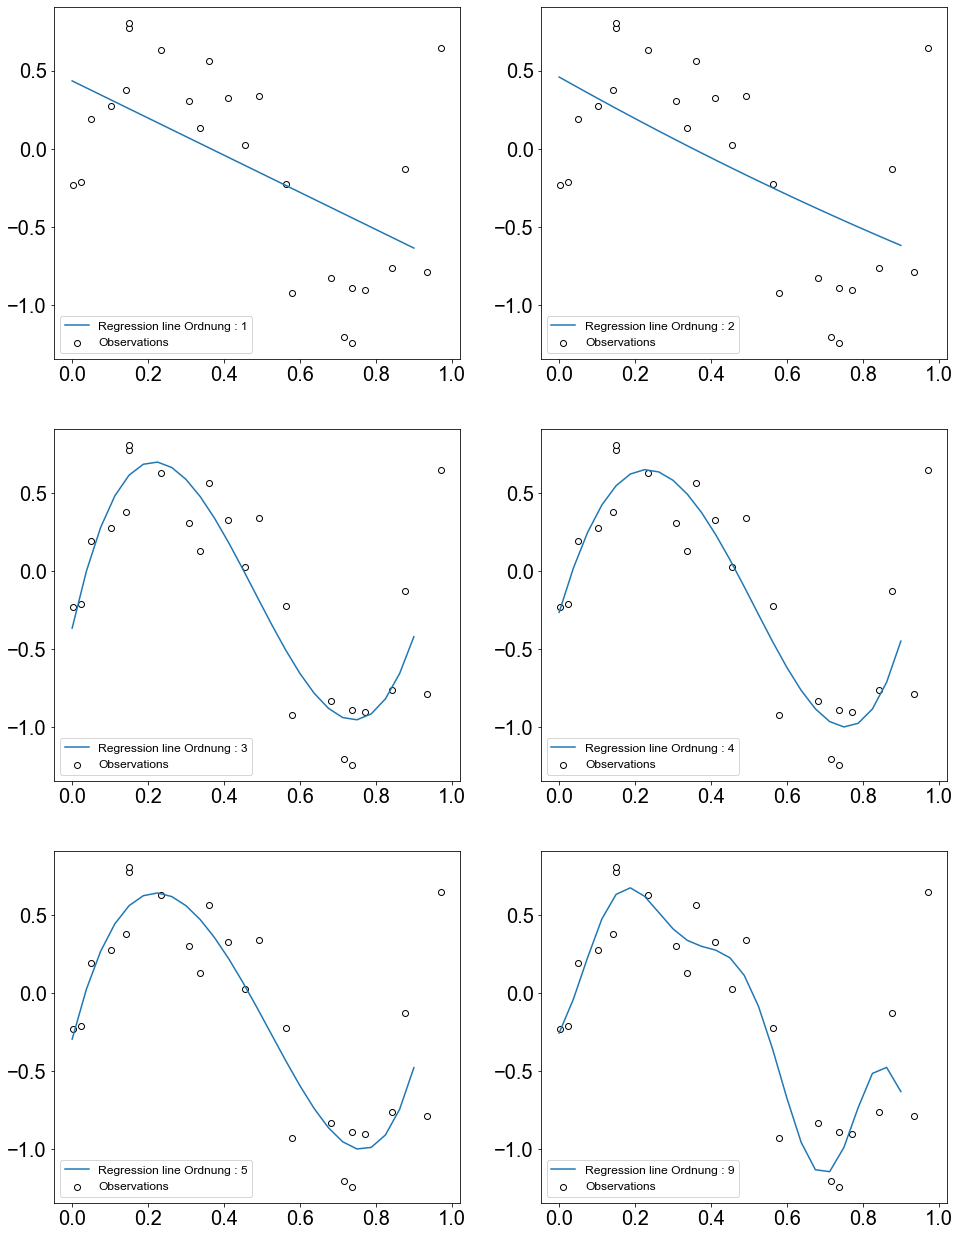

In [49]:
RMSE_list = []

X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

order = [1,2,3,4,5,9]
fig, ax = plt.subplots(figsize=(16, 22),ncols=2, nrows=3)
ax = np.ravel(ax)
for e,i in enumerate(order):
    
    

    # Polynomial Fit
    poly = PolynomialFeatures(degree=i)
    X_2 = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_2, y)

    X_predict_reg_line = poly.transform(np.linspace(0,0.9, 25).reshape(-1,1))
    y_reg_line = model.predict(X_predict_reg_line)

    
    ax[e].plot(np.linspace(0,0.9, 25), y_reg_line, label="Regression line Ordnung : %i" % i)
    ax[e].scatter(x=X, y=y,
             color="white", edgecolor = 'k', label="Observations")
    
    RMSE = mean_squared_error(y,model.predict(X_2), squared=False)
    print('RMSE (k=) :',i,RMSE)
    RMSE_list.append(RMSE)
    ax[e].legend();

Fantastische Diagramme! Die Abbildung zeigt, dass wenn wir $k$, die Ordnung des Polynoms, erhöht, wird die Kurve flexibler und passt immer besser zu den Daten. Je besser die Daten angepasst werden, desto geringer wird der Fehler, $RMSE$.

Der Einfachheit halber plotten wir den $RMSE$ gegen $k$.

Text(0.5, 0, 'k-te Ordnung')

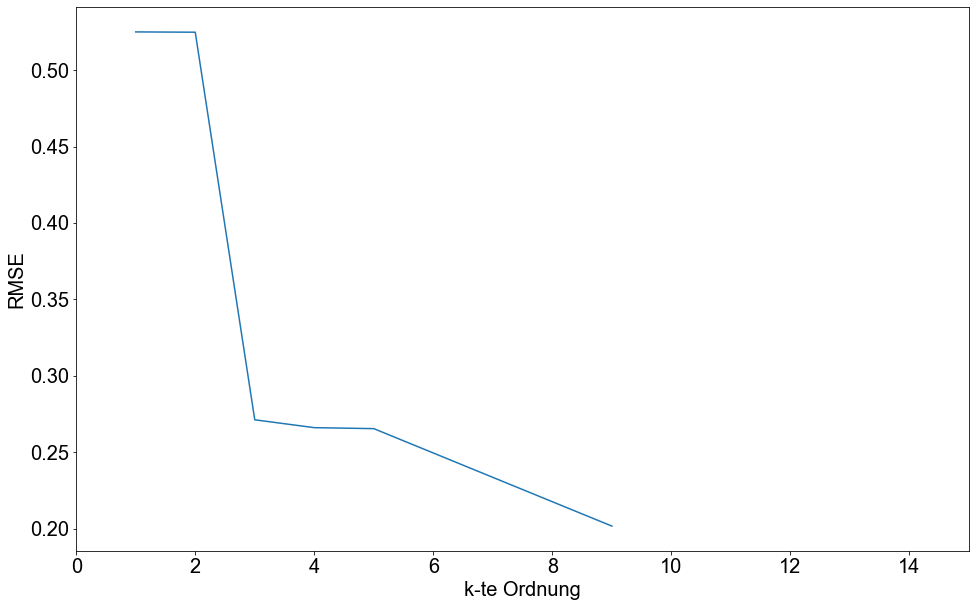

In [50]:
k = [1,2,3,4,5,9]
plt.plot(k,RMSE_list)
plt.xlim(0,15)
plt.ylabel('RMSE')
plt.xlabel('k-te Ordnung')

Daher stellt sich wieder einmal die Frage, welches Polynom am besten zu den Daten passt. Glauben wir, dass das Polynom der Ordnung $9$ am besten zu dem zugrunde liegenden Datenerzeugungsprozess passt? Obwohl wir eine hervorragende Anpassung an die Beobachtungsdaten erhalten, indem wir die Ordnung des Polynoms erhöhen, bleibt es fraglich, ob das Polynom hoher Ordnung gut verallgemeinert werden kann. Stellen Sie sich vor, wir führen eine neue Messreihe durch und erhalten neue Daten. Glauben Sie, dass die wild schwingende Kurve eines Polynoms hoher Ordnung immer noch gut zu den Daten passt? Nein, wahrscheinlich nicht!

Dieses Verhalten wird als <a href="https://de.wikipedia.org/wiki/%C3%9Cberanpassung">Überanpassung</a> bezeichnet. Erinnern Sie sich daran, dass das Ziel darin besteht, die Parameter aus den Daten zu lernen. Wir sind also daran interessiert, eine gute Verallgemeinerung des Modells zu erreichen und nicht unbedingt perfekt angepasste Beobachtungsdaten.

### Aus den Daten lernen

Wie können wir das Problem lösen? Wie bestimmen wir das beste Polynom $n$-ter Ordnung für unseren Datensatz? Nun, es gibt viele Methoden und Strategien, um einer Überanpassung entgegenzuwirken. In diesem Abschnitt verfolgen wir einen einfachen Ansatz. Zunächst teilen wir den Datensatz in zwei Teile auf. Einen Teil nennen wir **Trainingsmenge**, den anderen Teil nennen wir **Validierungsmenge**. Dann verwenden wir alle Daten des Trainingssatzes, um die Modellparameter $\beta_i$ zu lernen, und zwar auf die gleiche Weise wie oben. Danach wenden wir das gelernte Modell an, um die Daten des Validierungssatzes vorherzusagen, und bewerten die Leistung des Modells, indem wir den $RMSE$ berechnen. Wir verwenden also die Validierungsmenge, um die, durch $k$ gegebene, Komplexität des Modells zu optimieren.

Leider brauchen wir, wenn wir aus Daten lernen wollen, letztendlich auch Daten, aus denen wir lernen können. Bislang haben wir mit $25$ Beobachtungen gearbeitet. Das ist nicht viel. In realen Anwendungen müssten wir wahrscheinlich neue Beobachtungen durch eine neue Messreihen gewinnen. In unserer Übung können wir jedoch relativ leicht mehr Daten erzeugen. Daher setzen wir dieses Beispiel mit einem neuen Datensatz von $60$ Beobachtungen fort.

Lassen Sie uns die Daten plotten!

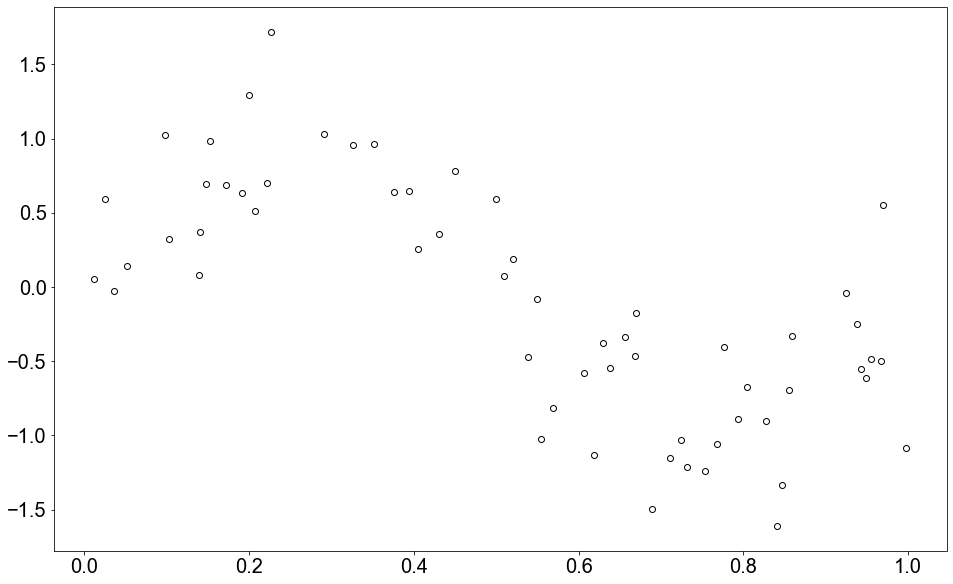

In [51]:
data = pd.read_csv('example_data.csv')
plt.scatter(data['x'],data['y'],color = 'white',edgecolor ='k')

### Trainings- und Validierungsmenge

Nun sind wir bereit, unsere Trainings- und Validierungsmenge zu erstellen. Dazu verwenden wir die Funktion `train_test_split()` aus dem `sklearn`-Paket. Wir teilen die Daten so auf, dass $65 \%$ der Daten dem Trainingsset und der Rest, $35 \%$ der Daten, dem Validationsset zugewiesen werden.

In [59]:
x = data.x.values.reshape(-1, 1)
y = data.y.values.reshape(-1, 1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.35,random_state=42)

In [60]:
# Überprüfen der Dimension von Training und Validierungsdatensatz
print('Trainingset :')
print('x_train :',np.shape(x_train))
print('y_train :',np.shape(y_train))

print('Validationset :')
print('x_val :',np.shape(x_val))
print('y_val :',np.shape(y_val))

Trainingset :
x_train : (39, 1)
y_train : (39, 1)
Validationset :
x_val : (21, 1)
y_val : (21, 1)


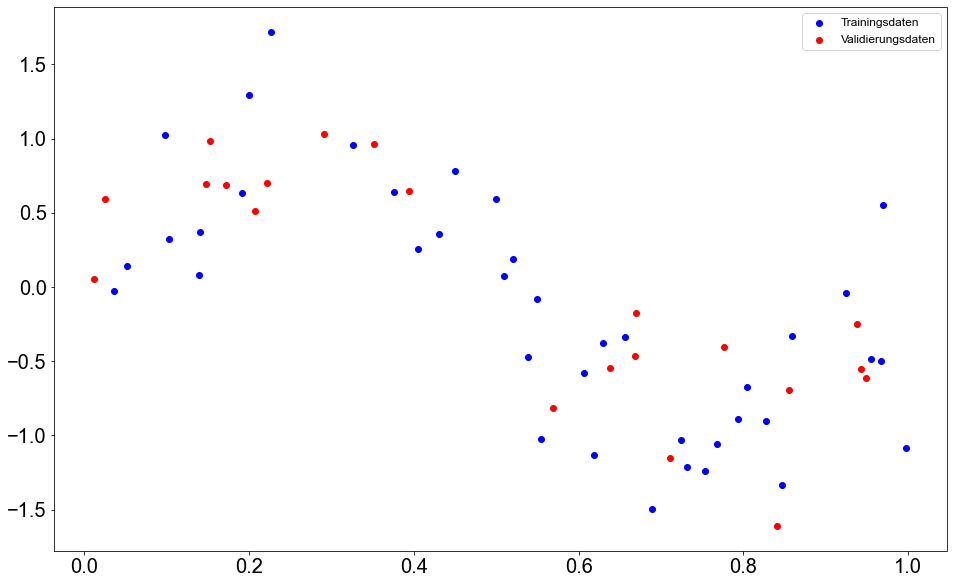

In [61]:
# Transponiere x_train,y_train
x_train= x_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)

# Transponiere x_val,y_val
x_val= x_val.reshape(-1,1)
y_val= y_val.reshape(-1,1)

# Plot
plt.scatter(x_train,y_train, label = 'Trainingsdaten', color = 'blue')
plt.scatter(x_test,y_test, label = 'Validierungsdaten', color = 'red')
plt.legend();

### Modellbildung und Modellbewertung

In dieser Übung werden wir $10$ Modelle mit $k=1,2,...,10$ erstellen. Wir bewerten jedes der $10$ polynomialen Regressionsmodelle, indem wir den $RMSE$ auf dem Trainingssatz berechnen. Nach der Erstellung des Modells und der Ermittlung der Modellparameter $\beta_i$ verwenden wir das Modell, um die Antwortvariable in der Validierungsmenge vorherzusagen. Auch hier stützen wir uns auf den $RMSE$, um die Vorhersagen für den Validierungssatz zu bewerten. Schließlich stellen wir den $RMSE$ jedes Modells sowohl für die Trainingsmenge als auch für die Validierungsmenge dar. Anhand des $RMSE$ bewerten wir die Generalisierung des Modells.

In [63]:
RMSE_list = []
RMSE_list2 = []

for i in range(1,11):
    
    # Polynomial Fit
    poly = PolynomialFeatures(degree=i)
    x_train2 = poly.fit_transform(x_train)
    x_val2 = poly.fit_transform(x_val)
    model = LinearRegression()
    model.fit(x_train2, y_train)
    
    # Berechne RMSE - Trainigsset
    RMSE = mean_squared_error(y_train,model.predict(x_train2), squared=False)
    print('RMSE_train (k=) :',i,RMSE)
    RMSE_list.append(RMSE)
    
    # Berechne RMSE - Validierungsset
    RMSE2 = mean_squared_error(y_val,model.predict(x_val2), squared=False)
    print('RMSE_val (k=) :',i,RMSE2)
    RMSE_list2.append(RMSE2)

RMSE_train (k=) : 1 0.6031557239743102
RMSE_val (k=) : 1 0.47381134570088695
RMSE_train (k=) : 2 0.6004085974052585
RMSE_val (k=) : 2 0.4804178397400819
RMSE_train (k=) : 3 0.4261978382454827
RMSE_val (k=) : 3 0.3715739708528932
RMSE_train (k=) : 4 0.42060503013326916
RMSE_val (k=) : 4 0.4213031668038495
RMSE_train (k=) : 5 0.3855656608713295
RMSE_val (k=) : 5 0.3916792774142613
RMSE_train (k=) : 6 0.37731268763999715
RMSE_val (k=) : 6 0.4323847275588543
RMSE_train (k=) : 7 0.3668573430032845
RMSE_val (k=) : 7 0.42179426604753084
RMSE_train (k=) : 8 0.3648477962898973
RMSE_val (k=) : 8 0.41725232840651444
RMSE_train (k=) : 9 0.3640659495613842
RMSE_val (k=) : 9 0.4442562221711262
RMSE_train (k=) : 10 0.34605466475999297
RMSE_val (k=) : 10 0.8547434032005609


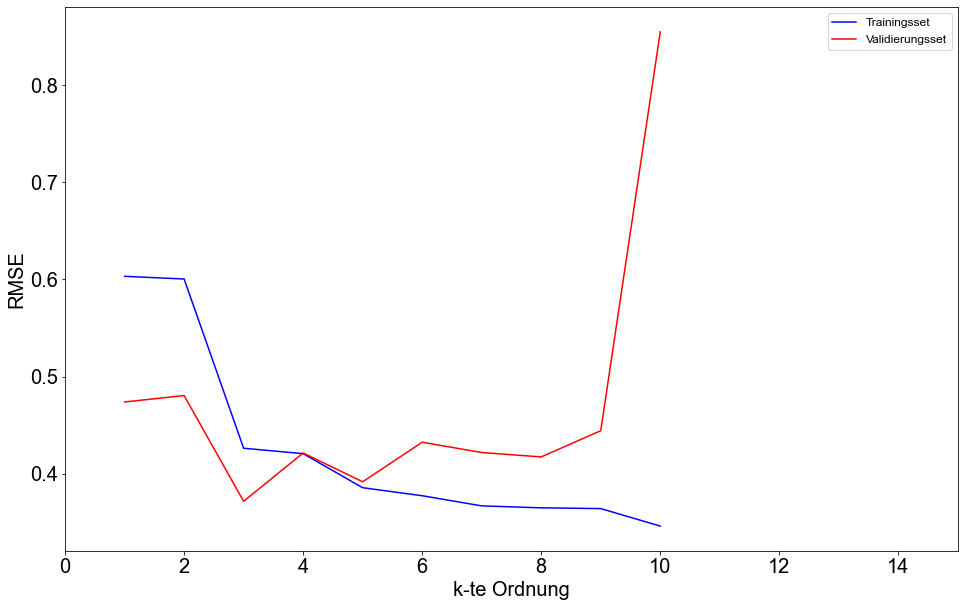

In [66]:
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k,RMSE_list,label='Trainingsset',color = 'blue')
plt.plot(k,RMSE_list2,label='Validierungsset',color = 'red')
plt.xlim(0,15)
plt.ylabel('RMSE')
plt.xlabel('k-te Ordnung')
plt.legend();

Die Abbildung zeigt, dass der Fehler bei den Trainingsdaten (blaue Linie) stetig abnimmt. Das macht durchaus Sinn, denn je komplexer das Modell wird, indem $k$ erhöht wird, desto besser passt das Modell zu den Trainingsdaten. Das gleiche Verhalten haben wir im obigen Abschnitt beobachtet, als wir unser Modell mit nur $25$ Beobachtungen gelernt haben. Wenn wir uns den $RMSE$ für den Validierungssatz (rote Linie) ansehen, sehen wir, dass mit zunehmendem $k$ und damit zunehmender Modellkomplexität der Fehler abnimmt. Es gibt jedoch einen "Sweet Spot", der durch den niedrigsten $RMSE$ angezeigt wird, an dem das Modell gerade komplex genug ist, um auf den bisher ungesehenen Validierungsdaten gut zu generalisieren. Wenn die Modellkomplexität weiter zunimmt, beginnt auch der $RMSE$ zu steigen. Dies deutet auf eine Überanpassung des Modells hin. Das Modell merkt sich also die Daten in der Trainingsmenge gut, aber die Vorhersagekraft des Modells für bisher ungesehene Daten, wie die Daten der Validierungsmenge, wird schlechter. Ein Blick auf die obige Abbildung zeigt, dass der niedrigste Fehler im Validierungssatz, der so genannte Sweet Spot, für ein Regressionsmodell $3$-ter Ordnung erreicht wird.

### Vorstellung des Modells

Im vorangegangenen Abschnitt haben wir festgestellt, dass ein polynomiales Regressionsmodell der Ordnung $3$ in der Validierungsgruppe am besten funktioniert. Nun stellen wir dieses Modell auf dem gesamten Datensatz dar, um seine Qualität visuell zu bewerten. Außerdem stellen wir die Funktion dar, die dem Prozess der Datengenerierung zugrunde liegt.

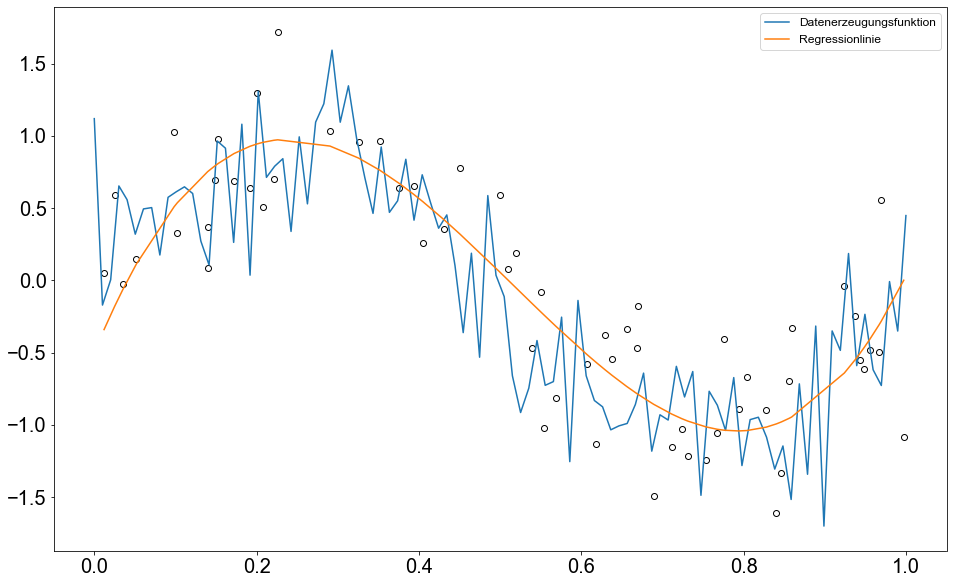

In [105]:
# Erzeuge sin(pi*x) + Zufallsrauschen
noise = np.random.normal(0,0.35,100)
x_org = np.linspace(0,1,100)   
y_org = np.sin(2*np.pi*x_org) + noise

data2 = data.sort_values(by='x')
x = data2['x'].values.reshape(-1,1)
y = data2['y'].values.reshape(-1,1)

# Transponiere x_train,y_train
x_train= x_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)

# Polynomial Fit
poly = PolynomialFeatures(degree=3)


x_train2 = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train2, y_train)
x2 = poly.fit_transform(x)

y_reg_line = model.predict(x2)

plt.plot(x_org, y_org, label='Datenerzeugungsfunktion')
plt.plot(x, y_reg_line, label='Regressionlinie')
plt.scatter(x,y,color = 'white',edgecolor ='k')
plt.legend();

Die Abbildung zeigt, dass unser Modell die Daten gut abbildet und wir daher recht zufrieden damit sein können.

### Datenerzeugungsfunktion

Die Eingabewerte $x_n$ für die zugrundeliegende Funktion werden gleichmäßig im Bereich $U(0,1)$ erzeugt, und die entsprechenden Zielwerte $y$ erhält man, indem man zunächst die entsprechenden Werte der Funktion $\sin( \pi x )$ berechnet und dann zufälliges Rauschen mit einer Gaußschen Verteilung mit einer Standardabweichung von $0,35$ hinzufügt.